max|Δ(A_true_solve - A_true_yaml)| = 1.293e-02


/scratch/slurm/52414281/.cache/tmp/ipykernel_549139/1505725698.py:120: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


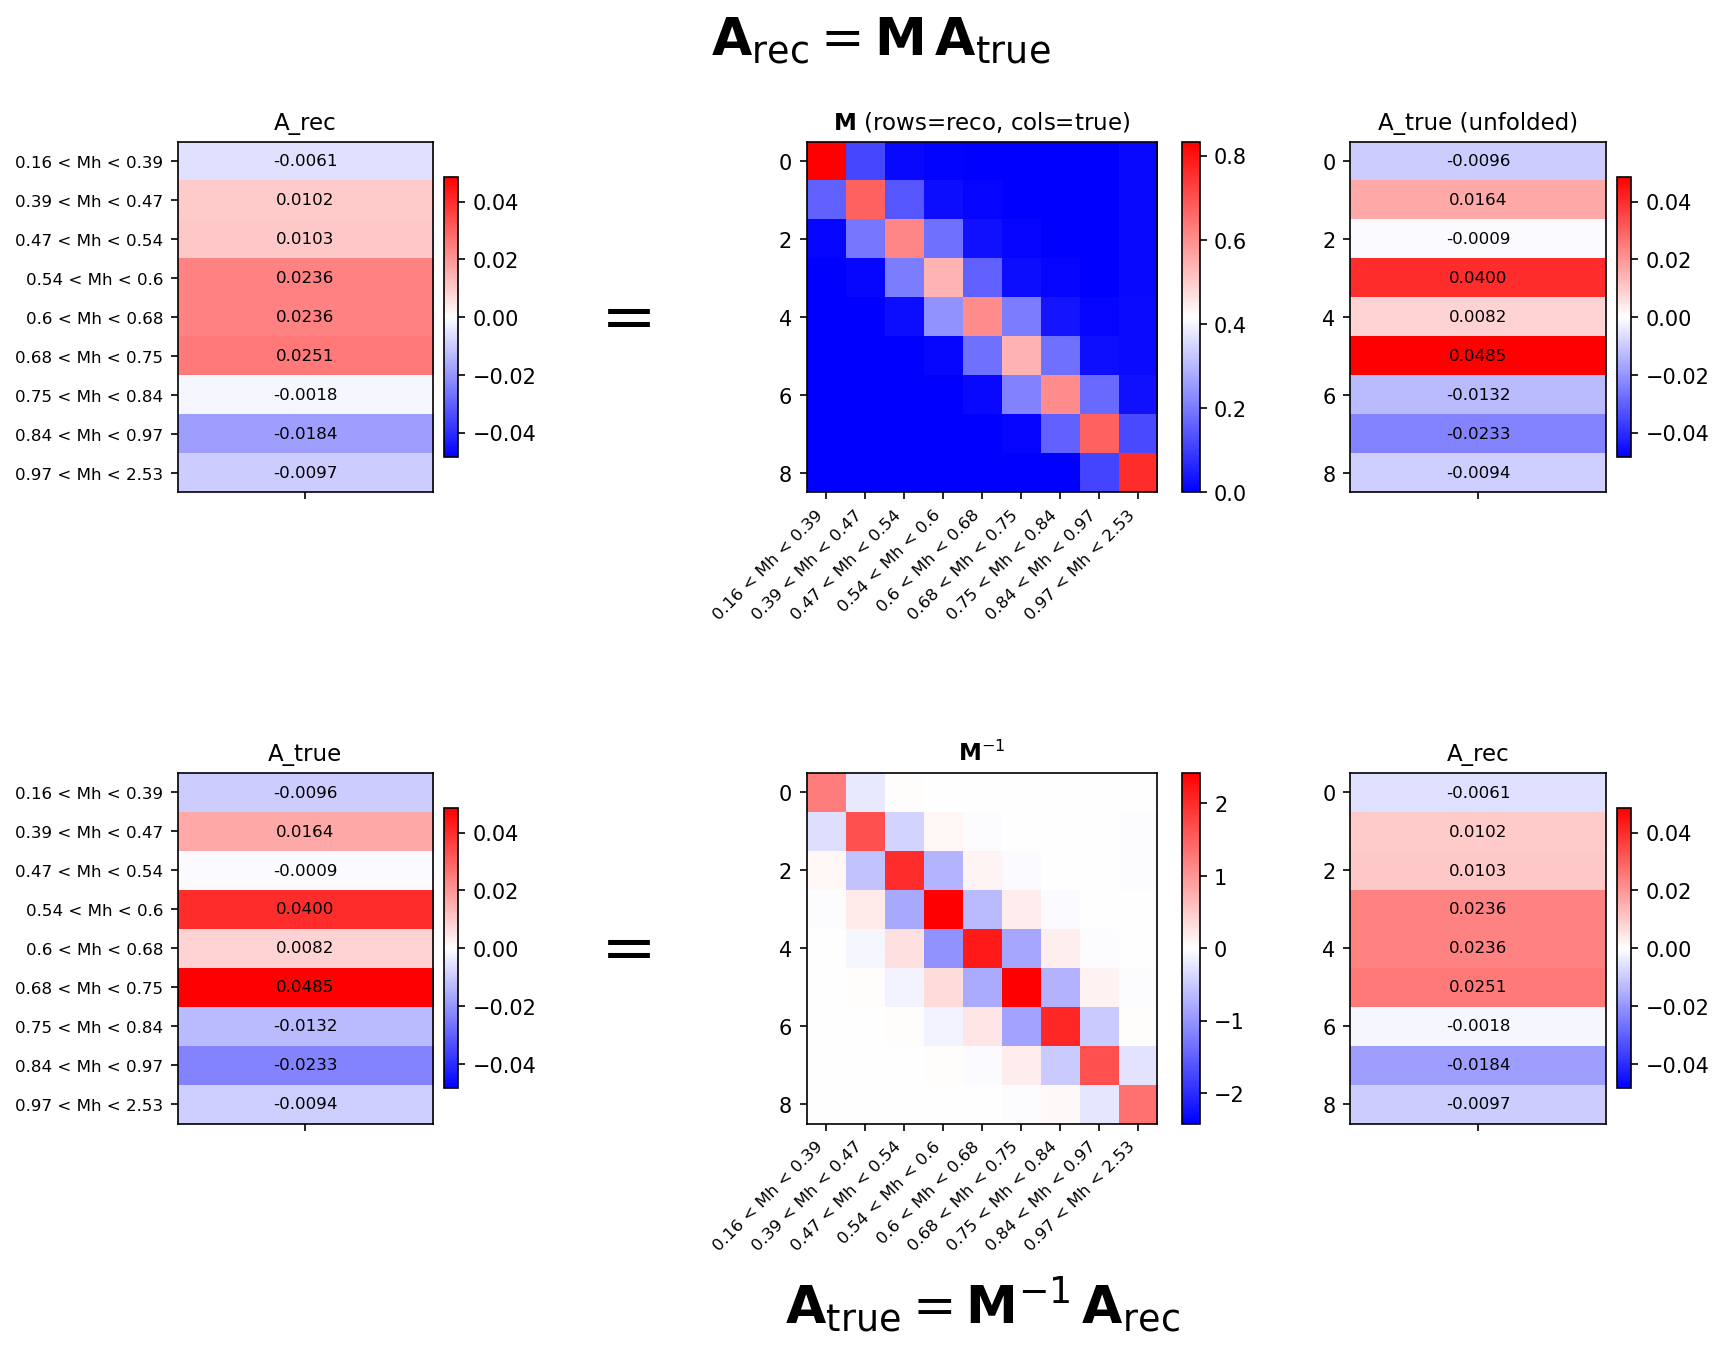

In [10]:
# Visualize A_rec = M · A_true and A_true = M^{-1} · A_rec from binMigration_data.yaml
# Top row:    [ A_rec |  M  | A_true ]
# Bottom row: [ A_true | M^{-1} | A_rec ]
#
# Left/right panels are N×1 "2D hists" with values annotated in each cell.
# Center panels are N×N matrices. All use the "rainbow" colormap.

import numpy as np
import yaml
import matplotlib.pyplot as plt
from pathlib import Path

# --- load YAML ---
yaml_path = Path("/work/clas12/users/gmat/clas12/YAPWR/out/full_v0/config_config_Mh_0p16_0p39/piminus_pi0/MC_RGA_outbending/module-out___binMigration/"+
                  "binMigration_data___b_1.yaml")  # <- change as needed
with yaml_path.open("r") as f:
    y = yaml.safe_load(f)

# Orientation: A_rec = M * A_true  (rows=reco i, cols=true j)
M      = np.array(y["binMigrationMatrix"], dtype=float)
A_rec  = np.array(y["unalteredAsymValues_vec"], dtype=float)
labels = list(y.get("bin_order", [f"bin{i}" for i in range(len(A_rec))]))
converted = [
    f"{low} < Mh < {high}"
    for low, high in (
        (s.split('_')[2].replace('p', '.'), s.split('_')[3].replace('p', '.'))
        for s in labels
    )
]
labels=converted
# Compute A_true (prefer solve for numerical stability)
A_true = np.linalg.solve(M, A_rec)

# Optional: compare to YAML alteredAsymValues_vec if present
if "alteredAsymValues_vec" in y:
    A_true_yaml = np.array(y["alteredAsymValues_vec"], dtype=float)
    max_delta = np.max(np.abs(A_true - A_true_yaml))
    print(f"max|Δ(A_true_solve - A_true_yaml)| = {max_delta:.3e}")

# Precompute inverse for bottom row center
M_inv = np.linalg.inv(M)

# --- plotting ---
N = len(A_rec)
fig = plt.figure(figsize=(12.5, 8.5), dpi=150)
gs = fig.add_gridspec(2, 3, width_ratios=[1.0, 2.2, 1.0], height_ratios=[1.0, 1.0], wspace=0.35, hspace=0.8)
# Top row axes
axL  = fig.add_subplot(gs[0, 0])
axC  = fig.add_subplot(gs[0, 1])
axR  = fig.add_subplot(gs[0, 2])

# Bottom row axes
axL2 = fig.add_subplot(gs[1, 0])
axC2 = fig.add_subplot(gs[1, 1])
axR2 = fig.add_subplot(gs[1, 2])

# Shared symmetric color scale for vectors (left/right panels)
vmax_vec = max(np.max(np.abs(A_rec)), np.max(np.abs(A_true)))
vmin_vec, vmax_vec = -vmax_vec, vmax_vec

# Symmetric color scale for M^{-1} (can be negative)
vmax_inv = np.max(np.abs(M_inv))
vmin_inv, vmax_inv = -vmax_inv, vmax_inv

# --- TOP ROW ---
# Left: A_rec
imL = axL.imshow(A_rec.reshape(-1, 1), aspect='auto', vmin=vmin_vec, vmax=vmax_vec, cmap="bwr")
axL.set_title("A_rec", fontsize=11)
axL.set_yticks(np.arange(N)); axL.set_yticklabels(labels, fontsize=8)
axL.set_xticks([0]); axL.set_xticklabels([""], fontsize=8)
fig.colorbar(imL, ax=axL, fraction=0.05, pad=0.04)
for i, val in enumerate(A_rec):
    axL.text(0, i, f"{val:.4f}", ha='center', va='center', fontsize=8, color='black')

# Center: M (rows=reco, cols=true)
imC = axC.imshow(M, aspect='equal', cmap="bwr", vmin=0.0, vmax=np.max(M))
axC.set_title(r"$\mathbf{M}$ (rows=reco, cols=true)", fontsize=11)
axC.set_xticks(np.arange(N)); axC.set_xticklabels(labels, rotation=45, ha='right', fontsize=8)
fig.colorbar(imC, ax=axC, fraction=0.05, pad=0.04)

# Right: A_true
imR = axR.imshow(A_true.reshape(-1, 1), aspect='auto', vmin=vmin_vec, vmax=vmax_vec, cmap="bwr")
axR.set_title("A_true (unfolded)", fontsize=11)
axR.set_xticks([0]); axR.set_xticklabels([""], fontsize=8)
fig.colorbar(imR, ax=axR, fraction=0.05, pad=0.04)
for i, val in enumerate(A_true):
    axR.text(0, i, f"{val:.4f}", ha='center', va='center', fontsize=8, color='black')

# --- BOTTOM ROW ---
# Left: A_true (again, to show A_true = M^{-1} A_rec flow)
imL2 = axL2.imshow(A_true.reshape(-1, 1), aspect='auto', vmin=vmin_vec, vmax=vmax_vec, cmap="bwr")
axL2.set_title("A_true", fontsize=11)
axL2.set_yticks(np.arange(N)); axL2.set_yticklabels(labels, fontsize=8)
axL2.set_xticks([0]); axL2.set_xticklabels([""], fontsize=8)
fig.colorbar(imL2, ax=axL2, fraction=0.05, pad=0.04)
for i, val in enumerate(A_true):
    axL2.text(0, i, f"{val:.4f}", ha='center', va='center', fontsize=8, color='black')

# Center: M^{-1}
imC2 = axC2.imshow(M_inv, aspect='equal', cmap="bwr", vmin=vmin_inv, vmax=vmax_inv)
axC2.set_title(r"$\mathbf{M}^{-1}$", fontsize=11)
axC2.set_xticks(np.arange(N)); axC2.set_xticklabels(labels, rotation=45, ha='right', fontsize=8)
fig.colorbar(imC2, ax=axC2, fraction=0.05, pad=0.04)

# Right: A_rec (again)
imR2 = axR2.imshow(A_rec.reshape(-1, 1), aspect='auto', vmin=vmin_vec, vmax=vmax_vec, cmap="bwr")
axR2.set_title("A_rec", fontsize=11)
axR2.set_xticks([0]); axR2.set_xticklabels([""], fontsize=8)
fig.colorbar(imR2, ax=axR2, fraction=0.05, pad=0.04)
for i, val in enumerate(A_rec):
    axR2.text(0, i, f"{val:.4f}", ha='center', va='center', fontsize=8, color='black')

# Row-level captions
fig.suptitle(r"$\mathbf{A}_{\mathrm{rec}} = \mathbf{M}\,\mathbf{A}_{\mathrm{true}}$", fontsize=25)
axC2.set_xlabel(r"$\mathbf{A}_{\mathrm{true}} = \mathbf{M}^{-1}\,\mathbf{A}_{\mathrm{rec}}$", fontsize=25, labelpad=10)

fig.text((axL.get_position().x1 + axC.get_position().x0)/2, axL.get_position().y0 + 0.5*axL.get_position().height, r"$=$", ha="center", va="center", fontsize=32)
fig.text((axL2.get_position().x1 + axC2.get_position().x0)/2, axL2.get_position().y0 + 0.5*axL2.get_position().height, r"$=$", ha="center", va="center", fontsize=32)

fig.tight_layout()
plt.show()


cond(M) = 4.079e+00
YAML/naive inverse source: YAML key 'binMigrationMatrix_inverse'
|| (YAML/naive inverse) - (Tikhonov inverse) ||_F = 4.408e+00


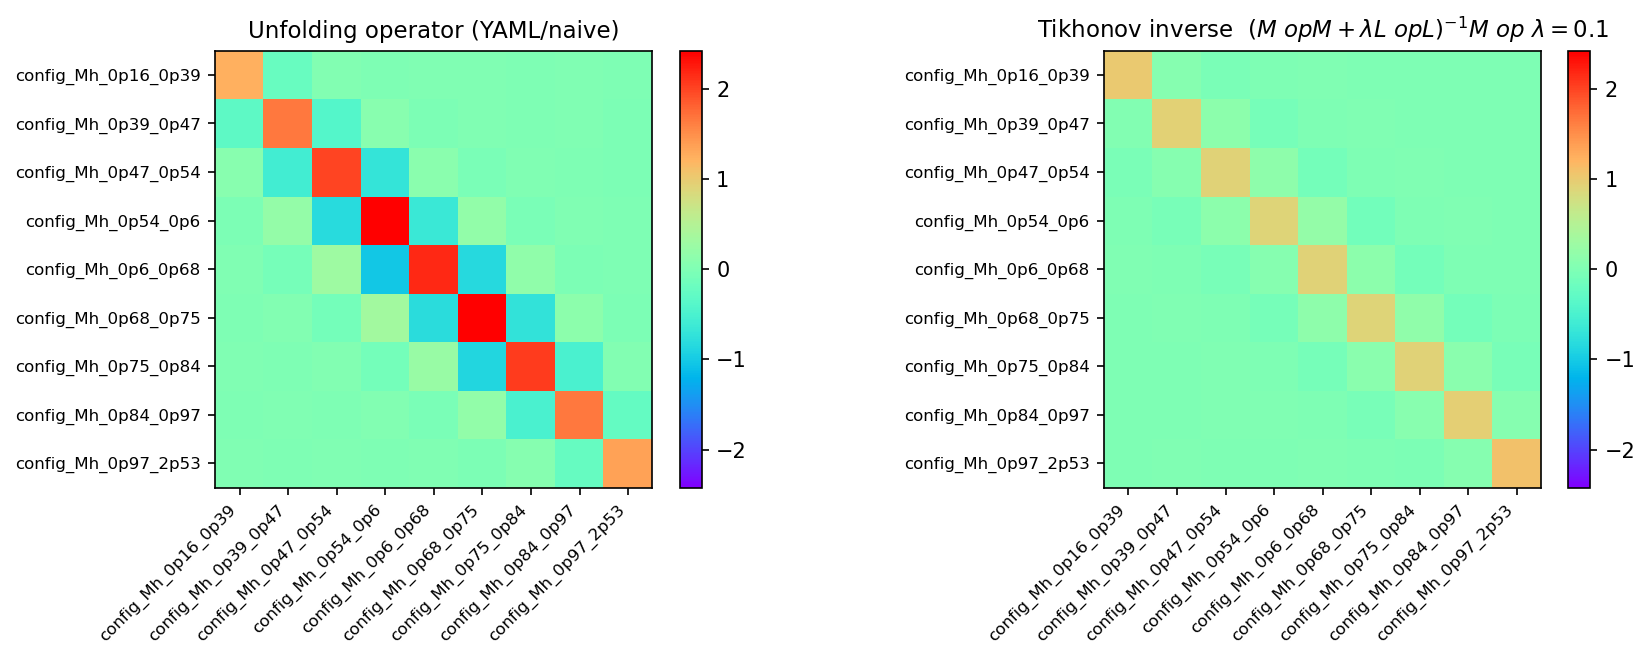

In [24]:
# === Compare YAML/naive inverse vs Tikhonov-regularized inverse ==================
# Requirements: variables y (dict), M (NxN), labels (length N) from the previous cell.
# If an inverse matrix is present in the YAML (e.g., 'binMigrationInverse'), it uses it.
# Otherwise it uses np.linalg.inv(M) as the "YAML/naive" inverse.
#
# Tikhonov operator:  M_lambda^{-1} = (M^T M + λ L^T L)^{-1} M^T
# Here L is a first-difference matrix (size (N-1) x N), which encourages smooth x.

import numpy as np
import yaml
import matplotlib.pyplot as plt
from pathlib import Path

# --- Ensure we have M, y, labels from earlier; if not, reload using yaml_path ---
try:
    M        # noqa
    y        # noqa
    labels   # noqa
except NameError:
    # If the variables aren't defined in this notebook yet, set yaml_path before running.
    if "yaml_path" not in globals():
        raise RuntimeError("Please define `yaml_path` (Path to binMigration_data.yaml) or run the previous cell first.")
    with yaml_path.open("r") as f:
        y = yaml.safe_load(f)
    M      = np.array(y["binMigrationMatrix"], dtype=float)
    labels = list(y.get("bin_order", [f"bin{i}" for i in range(M.shape[0])]))

N = M.shape[0]

# --- Get "YAML/naive" unfolding operator ----------------------------------------
# Try to discover a precomputed inverse/unfolding matrix in the YAML;
# otherwise fall back to the literal inverse.
yaml_inverse_keys = [
    "binMigrationInverse",
    "binMigrationMatrix_inverse",
    "unfoldingOperator",
    "unfolding_matrix",
]
M_inv_yaml = None
for k in yaml_inverse_keys:
    if k in y:
        M_inv_yaml = np.array(y[k], dtype=float)
        break

if M_inv_yaml is None:
    # Fall back to direct inverse; if singular, use pseudoinverse.
    try:
        M_inv_yaml = np.linalg.inv(M)
        src_note = "np.linalg.inv(M)"
    except np.linalg.LinAlgError:
        M_inv_yaml = np.linalg.pinv(M, rcond=1e-12)
        src_note = "np.linalg.pinv(M)"

else:
    src_note = f"YAML key '{k}'"

# --- Build Tikhonov-regularized inverse  ----------------------------------------
# First-difference L (size (N-1) x N)
L = np.zeros((N - 1, N), dtype=float)
for i in range(N - 1):
    L[i, i]     = -1.0
    L[i, i + 1] =  1.0

lam = 0.1  # <-- adjust as needed; consider L-curve or GCV for data-driven choice
A = M.T @ M + lam * (L.T @ L)
M_inv_tikh = np.linalg.solve(A, M.T)

# --- Diagnostics ----------------------------------------------------------------
cond_M = np.linalg.cond(M)
diff_norm = np.linalg.norm(M_inv_yaml - M_inv_tikh, ord="fro")
print(f"cond(M) = {cond_M:.3e}")
print(f"YAML/naive inverse source: {src_note}")
print(f"|| (YAML/naive inverse) - (Tikhonov inverse) ||_F = {diff_norm:.3e}")

# --- Plot: side-by-side 2D heatmaps (rainbow colormap, shared symmetric scale) ---
fig, axes = plt.subplots(1, 2, figsize=(12, 4.5), dpi=150)

# Shared symmetric color scale across both inverses
mx = np.max(np.abs([M_inv_yaml, M_inv_tikh]))
vmin, vmax = -mx, mx

# Optionally make zeros appear white (mostly relevant if values can be exactly zero)
cmap = plt.cm.rainbow
cmap = cmap.copy()
cmap.set_bad("white")

# Left: YAML/naive inverse
ax0 = axes[0]
im0 = ax0.imshow(M_inv_yaml, aspect="equal", cmap=cmap, vmin=vmin, vmax=vmax)
ax0.set_title("Unfolding operator (YAML/naive)", fontsize=11)
ax0.set_xticks(np.arange(N)); ax0.set_xticklabels(labels, rotation=45, ha="right", fontsize=8)
ax0.set_yticks(np.arange(N)); ax0.set_yticklabels(labels, fontsize=8)
fig.colorbar(im0, ax=ax0, fraction=0.046, pad=0.04)

# Right: Tikhonov inverse
ax1 = axes[1]
im1 = ax1.imshow(M_inv_tikh, aspect="equal", cmap=cmap, vmin=vmin, vmax=vmax)
ax1.set_title("Tikhonov inverse  $(M^\top M+\lambda L^\top L)^{-1}M^\top$" + f" $\lambda={lam}$", fontsize=11)
ax1.set_xticks(np.arange(N)); ax1.set_xticklabels(labels, rotation=45, ha="right", fontsize=8)
ax1.set_yticks(np.arange(N)); ax1.set_yticklabels(labels, fontsize=8)
fig.colorbar(im1, ax=ax1, fraction=0.046, pad=0.04)

plt.tight_layout()
plt.show()


/scratch/slurm/51378072/.cache/tmp/ipykernel_2809634/3027483178.py:84: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


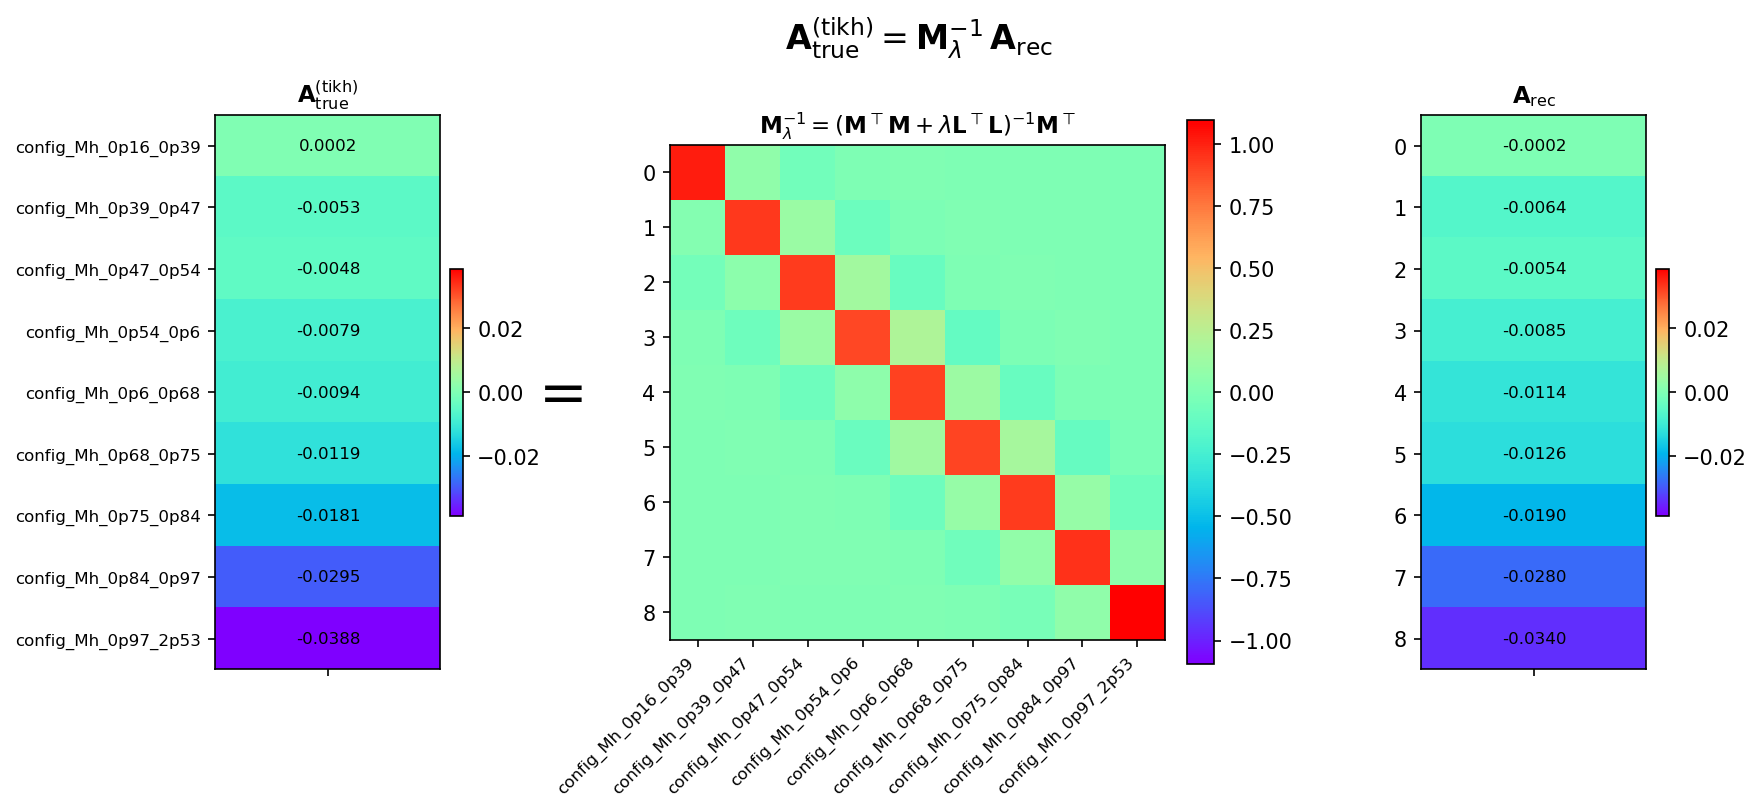

In [25]:
# === New plot: A_true^(tikh) = M_lambda^{-1} A_rec (3 columns) ==================
# Reuses variables from earlier cells; falls back to compute what's missing.

import numpy as np
import matplotlib.pyplot as plt

# --- Ensure prerequisites exist; otherwise compute/build them --------------------
try:
    M        # noqa
    A_rec    # noqa
    labels   # noqa
except NameError:
    raise RuntimeError("Please run the cell that loads M, A_rec, and labels first.")

N = len(A_rec)

# Build Tikhonov inverse if not already available
try:
    M_inv_tikh  # noqa
except NameError:
    # First-difference matrix L (size (N-1) x N)
    L = np.zeros((N - 1, N), dtype=float)
    for i in range(N - 1):
        L[i, i]     = -1.0
        L[i, i + 1] =  1.0
    lam = 1e-1  # <-- adjust to taste or replace with an L-curve/GCV chooser
    A_norm = M.T @ M + lam * (L.T @ L)
    M_inv_tikh = np.linalg.solve(A_norm, M.T)

# Compute Tikhonov-unfolded A_true
A_true_tikh = M_inv_tikh @ A_rec

# --- Plotting: 3 columns (A_true_tikh | M_inv_tikh | A_rec) ---------------------
fig = plt.figure(figsize=(12.5, 4.8), dpi=150)
gs  = fig.add_gridspec(1, 3, width_ratios=[1.0, 2.2, 1.0], wspace=0.6)

axL = fig.add_subplot(gs[0, 0])
axC = fig.add_subplot(gs[0, 1])
axR = fig.add_subplot(gs[0, 2])

# Symmetric color scales
vmax_vec = float(max(np.max(np.abs(A_rec)), np.max(np.abs(A_true_tikh))))
vmin_vec, vmax_vec = -vmax_vec, vmax_vec

vmax_inv = float(np.max(np.abs(M_inv_tikh)))
vmin_inv, vmax_inv = -vmax_inv, vmax_inv

cmap = plt.cm.rainbow

# Left: A_true^(tikh)
imL = axL.imshow(A_true_tikh.reshape(-1, 1), aspect='auto',
                 vmin=vmin_vec, vmax=vmax_vec, cmap=cmap)
axL.set_title(r"$\mathbf{A}_{\mathrm{true}}^{(\mathrm{tikh})}$", fontsize=11)
axL.set_yticks(np.arange(N)); axL.set_yticklabels(labels, fontsize=8)
axL.set_xticks([0]); axL.set_xticklabels([""], fontsize=8)
cbL = fig.colorbar(imL, ax=axL, fraction=0.05, pad=0.04)
for i, val in enumerate(A_true_tikh):
    axL.text(0, i, f"{val:.4f}", ha='center', va='center', fontsize=8, color='black')

# Center: M_lambda^{-1}
imC = axC.imshow(M_inv_tikh, aspect='equal', cmap=cmap, vmin=vmin_inv, vmax=vmax_inv)
axC.set_title(r"$\mathbf{M}_\lambda^{-1}=(\mathbf{M}^\top\mathbf{M}+\lambda \mathbf{L}^\top\mathbf{L})^{-1}\mathbf{M}^\top$", fontsize=11)
axC.set_xticks(np.arange(N)); axC.set_xticklabels(labels, rotation=45, ha='right', fontsize=8)
cbC = fig.colorbar(imC, ax=axC, fraction=0.05, pad=0.04)

# Right: A_rec
imR = axR.imshow(A_rec.reshape(-1, 1), aspect='auto',
                 vmin=vmin_vec, vmax=vmax_vec, cmap=cmap)
axR.set_title(r"$\mathbf{A}_{\mathrm{rec}}$", fontsize=11)
axR.set_xticks([0]); axR.set_xticklabels([""], fontsize=8)
cbR = fig.colorbar(imR, ax=axR, fraction=0.05, pad=0.04)
for i, val in enumerate(A_rec):
    axR.text(0, i, f"{val:.4f}", ha='center', va='center', fontsize=8, color='black')

# Caption and visual "=" between panels
fig.suptitle(r"$\mathbf{A}_{\mathrm{true}}^{(\mathrm{tikh})} = \mathbf{M}_\lambda^{-1}\,\mathbf{A}_{\mathrm{rec}}$", fontsize=16, y=1.02)

# Place "=" between left|center and center|right panels
mid_y = (axL.get_position().y0 + axL.get_position().y1) * 0.5
x_eq1 = (axL.get_position().x1 + axC.get_position().x0) * 0.5
x_eq2 = (axC.get_position().x1 + axR.get_position().x0) * 0.5
fig.text(x_eq1, mid_y, r"$=$", ha="center", va="center", fontsize=28)

plt.tight_layout()
plt.show()


/scratch/slurm/51378072/.cache/tmp/ipykernel_2809634/1543257131.py:100: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap("tab20", max(P, 12))


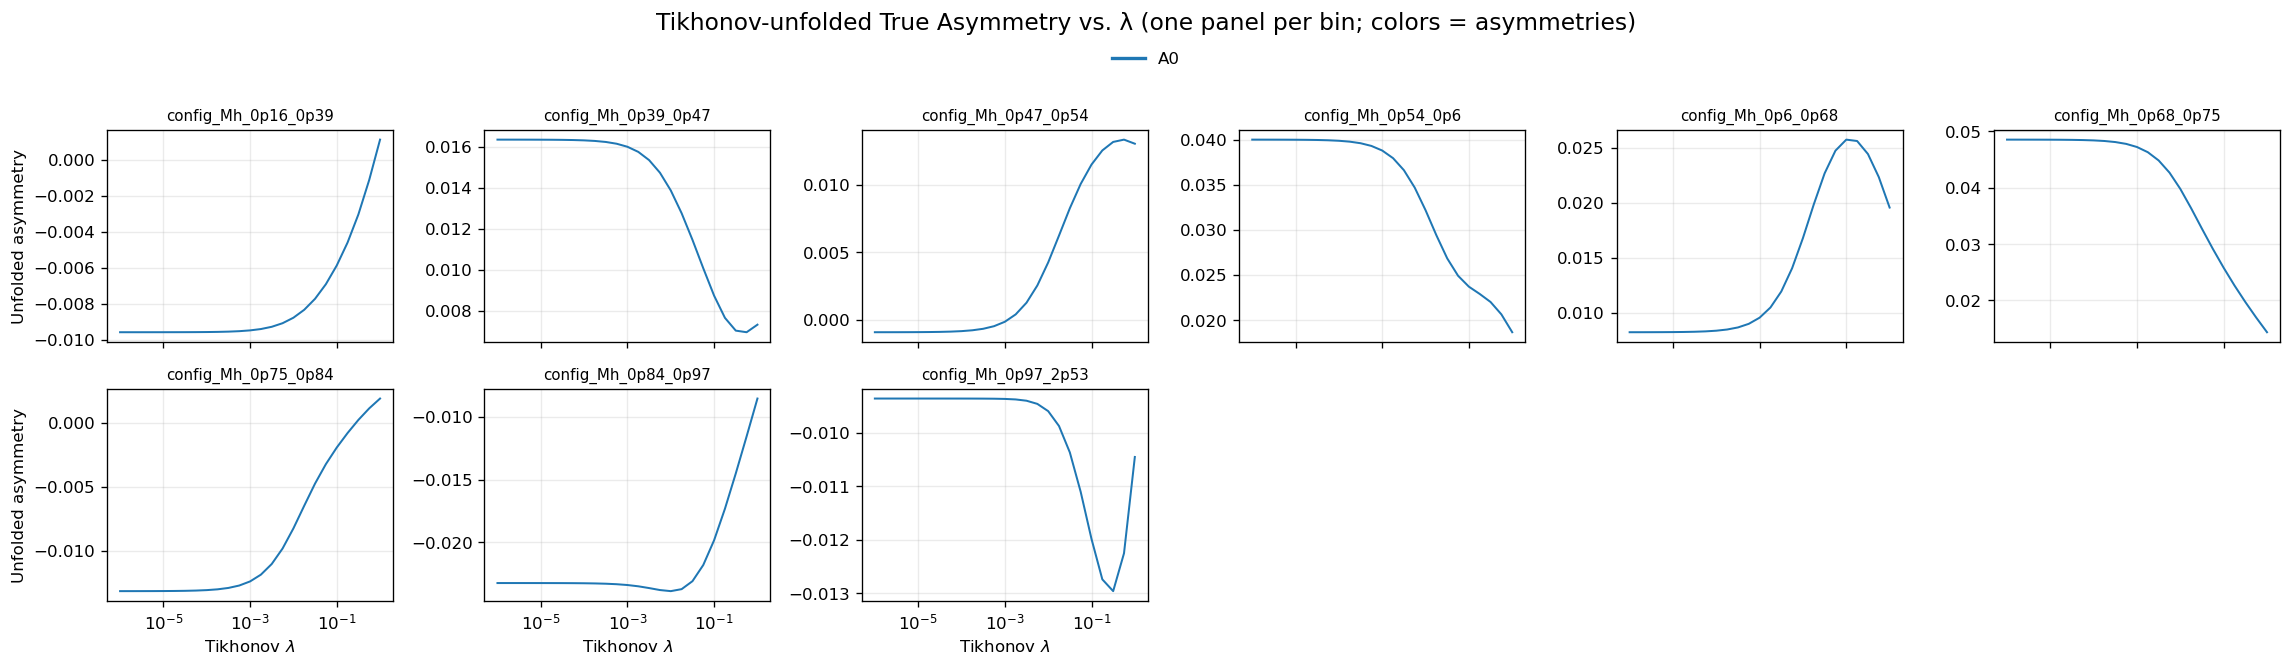

In [37]:
# === True Asymmetry vs Lambda, per-bin subplots, 12 asymmetries colored =========
# Requirements from prior cells:
#   - y (dict loaded from your binMigration_data.yaml)
#   - M (NxN migration matrix)
#   - labels (list of N bin labels)
# If your YAML *already* contains all 12 asymmetries, this cell will try to use them.
# Otherwise, set `yaml_paths` to a list of 12 YAML files, each holding one parameter.

import numpy as np
import matplotlib.pyplot as plt
import math
import yaml
from pathlib import Path

# --- load YAML ---
yaml_path = Path("/work/clas12/users/gmat/clas12/YAPWR/out/full_v0/config_config_Mh_0p16_0p39/piminus_pi0/MC_RGA_outbending/module-out___binMigration/"+
                  "binMigration_data___b_1.yaml")  # <- change as needed
with yaml_path.open("r") as f:
    y = yaml.safe_load(f)

# Orientation: A_rec = M * A_true  (rows=reco i, cols=true j)
M      = np.array(y["binMigrationMatrix"], dtype=float)
A_rec  = np.array(y["unalteredAsymValues_vec"], dtype=float)
labels = list(y.get("bin_order", [f"bin{i}" for i in range(len(A_rec))]))


# ---------- 1) Discover / assemble A_rec for 12 asymmetries ---------------------
# Try common keys for a (P x N) matrix, P=number of asymmetries (expect 12)
A_rec_mat = None
matrix_keys = [
    "unalteredAsymValues_matrix",
    "unalteredAsymValues_mat",
    "unalteredAsymValues_all",
    "unalteredAsymValues_byParam",
    "unalteredAsymValues_vecs",
]

for k in matrix_keys:
    if k in y:
        arr = np.array(y[k], dtype=float)
        # We expect shape (P, N). If it's (N, P), transpose.
        A_rec_mat = arr if arr.shape[0] <= arr.shape[1] else arr.T
        break

# If still None, fall back to loading 12 vectors from multiple YAMLs (edit list below)
if A_rec_mat is None:
    # TODO: if needed, fill this with your 12 YAML file paths (one per asymmetry parameter)
    yaml_paths = []  # e.g., ["/.../binMigration_data___param0.yaml", ..., "/.../param11.yaml"]
    if yaml_paths:
        A_list = []
        for p in yaml_paths:
            with Path(p).open("r") as f:
                yy = yaml.safe_load(f)
            A_list.append(np.array(yy["unalteredAsymValues_vec"], dtype=float))
        A_rec_mat = np.vstack(A_list)
    else:
        # Final fallback: we only have the single vector in this YAML
        # (the plot will show one curve per bin)
        A_rec_mat = np.atleast_2d(np.array(y["unalteredAsymValues_vec"], dtype=float))

P, N = A_rec_mat.shape

# Optional names for the 12 asymmetries
asym_names = y.get("modulation_names", [f"A{j}" for j in range(P)])

# ---------- 2) Build Tikhonov operator over a grid of lambdas -------------------
# First-difference operator L (size (N-1) x N)
L = np.zeros((N - 1, N), dtype=float)
for i in range(N - 1):
    L[i, i]     = -1.0
    L[i, i + 1] =  1.0

# Lambda grid (adjust as desired)
lams = np.logspace(-6, 0, 25)  # 25 points from 1e-6 to 1e1

# Precompute M^T M and L^T L
MTM = M.T @ M
LTL = L.T @ L

# For each lambda, build the Tikhonov inverse and unfold every asymmetry vector
# Store results as array with shape (n_lambda, P, N)
A_true_vs_lam = np.empty((len(lams), P, N), dtype=float)

for a, lam in enumerate(lams):
    M_inv_tikh = np.linalg.solve(MTM + lam * LTL, M.T)   # (N x N)
    # Unfold all P asymmetries at once:
    # A_rec_mat: (P x N) -> transpose to (N x P), apply inverse (N x N) @ (N x P) -> (N x P), transpose back
    unfolded = (M_inv_tikh @ A_rec_mat.T).T  # (P x N)
    A_true_vs_lam[a, :, :] = unfolded

# ---------- 3) Plot: one subplot per bin, curves colored by asymmetry ----------
# Layout
max_cols = 6
ncols = min(max_cols, N)
nrows = math.ceil(N / ncols)
fig, axes = plt.subplots(nrows, ncols, figsize=(ncols*3.2, nrows*2.6), dpi=120, sharex=True)
axes = np.atleast_1d(axes).ravel()

# Colors: 12 distinct colors from a qualitative map
cmap = plt.cm.get_cmap("tab20", max(P, 12))
colors = [cmap(j) for j in range(P)]

# Plot each bin
for i in range(N):
    ax = axes[i]
    for j in range(P):
        # Curve: lambda -> A_true(bin=i, asym=j)
        ax.plot(lams, A_true_vs_lam[:, j, i], label=asym_names[j], color=colors[j], linewidth=1.2)
    ax.set_xscale("log")
    ax.set_title(labels[i] if i < len(labels) else f"bin {i}", fontsize=9)
    ax.grid(True, alpha=0.25)
    if i % ncols == 0:
        ax.set_ylabel("Unfolded asymmetry")
    if i >= (nrows-1)*ncols:
        ax.set_xlabel(r"Tikhonov $\lambda$")

# Hide any empty axes
for k in range(N, len(axes)):
    fig.delaxes(axes[k])

# One shared legend (outside)
handles = [plt.Line2D([0],[0], color=colors[j], lw=2, label=asym_names[j]) for j in range(P)]
fig.legend(handles=handles, loc="upper center", ncol=min(P, 6), bbox_to_anchor=(0.5, 1.02), frameon=False)

fig.suptitle("Tikhonov-unfolded True Asymmetry vs. λ (one panel per bin; colors = asymmetries)", y=1.06, fontsize=14)
plt.tight_layout()
plt.show()


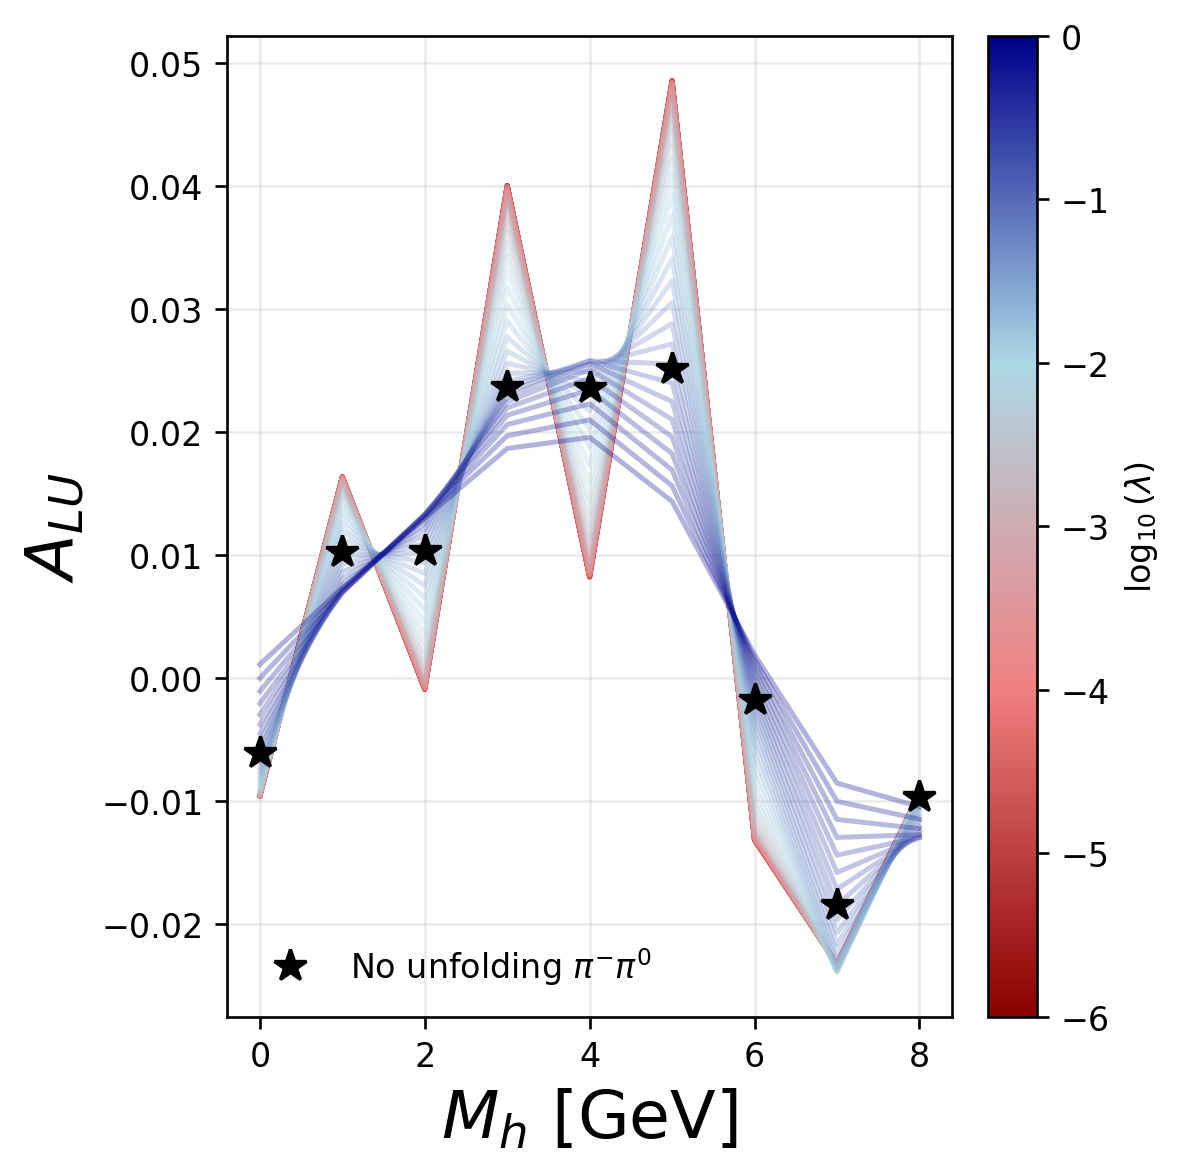

In [12]:
# Overlay reconstructed asymmetry points on the 50-λ gradient plot

import numpy as np
import matplotlib.pyplot as plt
import yaml
from pathlib import Path
from matplotlib.colors import LinearSegmentedColormap, Normalize
from matplotlib.cm import ScalarMappable

# --- Load YAML and data --------------------------------------------------------
yaml_path = Path("/work/clas12/users/gmat/clas12/YAPWR/out/full_v0/"
                 "config_config_Mh_0p16_0p39/piminus_pi0/"
                 "MC_RGA_outbending/module-out___binMigration/"
                 "binMigration_data___b_1.yaml")
with yaml_path.open() as f:
    y = yaml.safe_load(f)

M = np.array(y["binMigrationMatrix"], dtype=float)

# Build A_rec matrix (P x N)
matrix_keys = [
    "unalteredAsymValues_matrix", "unalteredAsymValues_mat",
    "unalteredAsymValues_all",    "unalteredAsymValues_byParam",
    "unalteredAsymValues_vecs"
]
A_rec_mat = None
for k in matrix_keys:
    if k in y:
        arr = np.array(y[k], dtype=float)
        A_rec_mat = arr if arr.shape[0] <= arr.shape[1] else arr.T
        break
if A_rec_mat is None:
    A_rec_mat = np.atleast_2d(np.array(y["unalteredAsymValues_vec"], dtype=float))
P, N = A_rec_mat.shape

# Determine Mh centers
def _get_Mh_centers(y_dict, N):
    for k in ["Mh_bin_centers", "bin_centers", "binCenters"]:
        if k in y_dict:
            return np.array(y_dict[k], dtype=float)[:N]
    return np.arange(N, dtype=float)

Mh_centers = _get_Mh_centers(y, N)

# Recompute unfolded asymmetries over 50 lambdas
lam_sel = np.logspace(-6, 0, 50)
MTM = M.T @ M
L = np.zeros((N - 1, N))
for i in range(N - 1):
    L[i, i]   = -1
    L[i, i+1] =  1
LTL = L.T @ L

A_true_sel = np.empty((len(lam_sel), P, N))
for idx, lam in enumerate(lam_sel):
    M_inv_tikh = np.linalg.solve(MTM + lam * LTL, M.T)
    A_true_sel[idx] = (M_inv_tikh @ A_rec_mat.T).T

# Create custom red→blue gradient colormap
cmap = LinearSegmentedColormap.from_list(
    "red_blue_grad", ["darkred", "lightcoral", "lightblue", "darkblue"]
)

# --- Plot with overlay ---------------------------------------------------------
fig, ax = plt.subplots(figsize=(5,5), dpi=240)

# Plot 50 λ-curves
for idx, lam in enumerate(lam_sel):
    color = cmap(idx / (len(lam_sel) - 1))
    ax.plot(Mh_centers,
            A_true_sel[idx, 0, :],
            color=color,
            alpha=0.3,
            linewidth=1.5)

# Overlay reconstructed asymmetry as black stars
ax.plot(Mh_centers,
        A_rec_mat[0, :],
        linestyle='None',
        marker='*',
        color='k',
        markersize=10,
        label='No unfolding $\pi^{-}\pi^{0}$')

# Axes and grid
mod0 = y.get("modulation_names", ["A0"])[0]
#ax.set_title(f"{mod0} vs $M_h$ for 50 λ", fontsize=12)
ax.set_xlabel("$M_h$ [GeV]",fontsize=20)
ax.set_ylabel("$A_{LU}$",fontsize=20)
ax.grid(True, alpha=0.25)

# Legend for stars
ax.legend(loc='best', frameon=False)

# Colorbar for λ gradient
norm = Normalize(vmin=np.log10(lam_sel[0]), vmax=np.log10(lam_sel[-1]))
sm = ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = fig.colorbar(sm, ax=ax, pad=0.04)
cbar.set_label(r"$\log_{10}(\lambda)$", fontsize=10)

plt.tight_layout()
plt.show()
